In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# load dataset
data = pd.read_csv("D:\Dataset\csvDataset\diabetes.csv")
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [5]:
data.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.take([5,423,571,733])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
5,5,116,74,0,0,25.6,0.201,30,0
423,2,115,64,22,0,30.8,0.421,21,0
571,2,130,96,0,0,22.6,0.268,21,0
733,2,106,56,27,165,29.0,0.426,22,0


In [8]:
data.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627  

In [10]:
#split dataset in features and target variable
X = data.iloc[:, :-1].values
#X

In [11]:
y = data.iloc[:, 8].values
# y

In [15]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, <br>
                                          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, <br>
                                          max_features=None, random_state=None, max_leaf_nodes=None, <br>
                                          min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)<br>

criterion{“gini”, “entropy”, “log_loss”}, default=”gini”<br>
The function to measure the quality of a split. Supported criteria are “gini” <br>
for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain<br>

max_featuresint, float or {“auto”, “sqrt”, “log2”}, default=None<br>
The number of features to consider when looking for the best split<br>
If “auto”, then max_features=sqrt(n_features).<br>
If “sqrt”, then max_features=sqrt(n_features).<br>
If “log2”, then max_features=log2(n_features).<br>
If None, then max_features=n_features.<br>

In [21]:
# Create Decision Tree classifer object
# min_samples_leaf:   A split point at any depth will only be considered if it leaves....
# ...at least min_samples_leaf training samples in each of the left and right branches. 
#  min_samples_leaf : int, float, optional (default=1)

#  min_samples_split : int, float, optional (default=2)
#  The minimum number of samples required to split an internal node:

model = DecisionTreeClassifier(criterion="entropy", max_depth=3,min_samples_leaf=2,max_features=None)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7987012987012987
[[88 11]
 [20 35]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [24]:
# You can also make a prediction for a single item, for e=xample:
# pregnant=6, insulin=0, 'bmi=33.6, age=50,glucose=148,bp=72, pedigree=0.627
model.predict([[1,97,66,15,140,23.2,0.487,22]])

array([0], dtype=int64)

In [25]:
# You can also make a prediction for a single item, for e=xample:
# pregnant=6, insulin=0, 'bmi=33.6, age=50,glucose=148,bp=72, pedigree=0.627
model.predict([[1,189,60,23,846,30.1,0.398,59 ]])

array([1], dtype=int64)

In [27]:
model = DecisionTreeClassifier(criterion="gini", max_depth=3,min_samples_leaf=2,max_features=None)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7857142857142857
[[85 14]
 [19 36]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        99
           1       0.72      0.65      0.69        55

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



In [29]:
# load dataset
data = pd.read_csv("D:\Dataset\csvDataset\iris.csv")
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [30]:
class_names=['Setosa','Versicolour','Virginica']
feature_cols=['Sepal Length','Sepal Width','Petal Length','Petal Width']

In [46]:
from sklearn import datasets
#iris = datasets.load_iris()
#X = iris.data[:, :2]  # we only take the first two features.
#y = iris.target

In [31]:
#split dataset in features and target variable
X = data.iloc[:, :-1].values
#X

In [32]:
y = data.iloc[:, 4].values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [33]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1) 

In [34]:
model = DecisionTreeClassifier(criterion="gini",  max_depth=3,min_samples_leaf=2,max_features=None)

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.92      0.96        13
           3       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [35]:
model.predict([[4.9,3.1,1.5,0.1]])

array([1], dtype=int64)

In [36]:
model.predict([[6.3,2.5,4.9,1.5]])

array([2], dtype=int64)

In [37]:
model.predict([[7.7,2.6,6.9,2.3]])

array([3], dtype=int64)

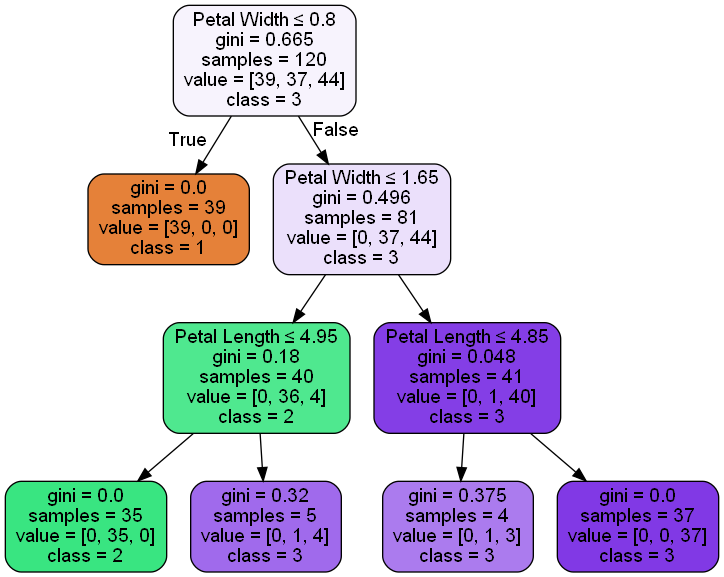

In [38]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1','2','3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())